In [2]:
library(tidyverse)

In [3]:
library(broom)

# Basic Use

[Reference](http://notchained.hatenablog.com/entry/2015/10/10/113543)

In [4]:
data(mtcars)

In [5]:
lmfit <- lm(mpg ~ wt, mtcars)
lmfit


Call:
lm(formula = mpg ~ wt, data = mtcars)

Coefficients:
(Intercept)           wt  
     37.285       -5.344  


In [6]:
tidy(lmfit) %>%
  knitr::kable(.) # For MarkDown



|term        |  estimate| std.error| statistic| p.value|
|:-----------|---------:|---------:|---------:|-------:|
|(Intercept) | 37.285126|  1.877627| 19.857575|       0|
|wt          | -5.344472|  0.559101| -9.559044|       0|

In [7]:
head(augment(lmfit))
    # augment
    #    Given an R statistical model or other non-tidy object, add columns to the original dataset 
    #    such as predictions, residuals and cluster assignments.

.rownames,mpg,wt,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
Mazda RX4,21.0,2.620,23.28261,0.6335798,-2.2826106,0.04326896,3.067494,1.327407e-02,-0.76616765
Mazda RX4 Wag,21.0,2.875,21.91977,0.5714319,-0.9197704,0.03519677,3.093068,1.723963e-03,-0.30743051
Datsun 710,22.8,2.320,24.88595,0.7359177,-2.0859521,0.05837573,3.072127,1.543937e-02,-0.70575249
Hornet 4 Drive,21.4,3.215,20.10265,0.5384424,1.2973499,0.03125017,3.088268,3.020558e-03,0.43275114
Hornet Sportabout,18.7,3.440,18.90014,0.5526562,-0.2001440,0.03292182,3.097722,7.599578e-05,-0.06681879
Valiant,18.1,3.460,18.79325,0.5552829,-0.6932545,0.03323551,3.095184,9.210650e-04,-0.23148309


In [8]:
glance(lmfit)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.7528328,0.7445939,3.045882,91.37533,1.293959e-10,2,-80.01471,166.0294,170.4266,278.3219,30


# Tidying k-means clustering

[Reference](https://cran.r-project.org/web/packages/broom/vignettes/kmeans.html)

In [9]:
library(dplyr) ; library(ggplot2)

## Make Data

In [10]:
set.seed(2014)
centers <- data.frame(cluster=factor(1:3), size=c(100, 150, 50), x1=c(5, 0, -3), x2=c(-1, 1, -2))
points <- centers %>% group_by(cluster) %>%
    do(data.frame(x1=rnorm(.$size[1], .$x1[1]),
                  x2=rnorm(.$size[1], .$x2[1])))

In [11]:
options(repr.plot.width=4, repr.plot.height=3)

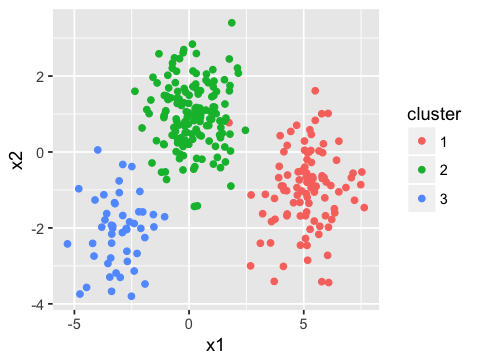

In [12]:
ggplot(points, aes(x1, x2, color=cluster)) + geom_point()

## K-means Clustering

In [13]:
points.matrix <- cbind(x1 = points$x1, x2 = points$x2)
kclust <- kmeans(points.matrix, 3)

In [14]:
summary(kclust)

             Length Class  Mode   
cluster      300    -none- numeric
centers        6    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

### View Results 

* cluster (300 values) contains information about each point
* centers, withinss and size (3 values) contain information about each cluster
* totss, tot.withinss, betweenss, and iter (1 value) contain information about the full clustering

In [15]:
tidy(kclust)

x1,x2,size,withinss,cluster
5.1791917,-0.9865170,99,204.96483,1
0.1583797,0.9797098,151,257.20360,2
-3.0653196,-2.0887225,50,78.64255,3


In [16]:
head(augment(kclust, points.matrix))
    # augment
    #    Given an R statistical model or other non-tidy object, add columns to the original dataset 
    #    such as predictions, residuals and cluster assignments.

x1,x2,.cluster
4.434320,0.5416470,1
5.321046,-0.9412882,1
5.125271,-1.5802282,1
6.353225,-1.6040549,1
3.712270,-3.4079344,1
5.322555,-0.7716317,1


In [17]:
glance(kclust)

totss,tot.withinss,betweenss,iter
3629.67,540.811,3088.859,2


## broom and dplyr for exploratory clustering

In [18]:
kclusts <- tibble(k=1:9) %>% group_by(k) %>% do(kclust=kmeans(points.matrix, .$k))

In [19]:
kclusts$kclust[[1]]

K-means clustering with 1 clusters of sizes 300

Cluster means:
        x1         x2
1 1.277964 -0.1805504

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1

Within cluster sum of squares by cluster:
[1] 3629.67
 (between_SS / total_SS =  -0.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"

In [20]:
clusters <- kclusts %>% group_by(k) %>% do(tidy(.$kclust[[1]]))
head(clusters)

Warning message:
“Grouping rowwise data frame strips rowwise nature”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

k,x1,x2,size,withinss,cluster
1,1.2779645,-0.1805504,300,3629.67001,1
2,5.1519762,-0.9709348,100,214.70138,1
2,-0.6590414,0.2146417,200,1070.06747,2
3,5.1791917,-0.9865170,99,204.96483,1
3,-3.0653196,-2.0887225,50,78.64255,2
3,0.1583797,0.9797098,151,257.20360,3


In [21]:
assignments <- kclusts %>% group_by(k) %>% do(augment(.$kclust[[1]], points.matrix))
head(assignments, 5)

Warning message:
“Grouping rowwise data frame strips rowwise nature”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

k,x1,x2,.cluster
1,4.434320,0.5416470,1
1,5.321046,-0.9412882,1
1,5.125271,-1.5802282,1
1,6.353225,-1.6040549,1
1,3.712270,-3.4079344,1


In [22]:
clusterings <- kclusts %>% group_by(k) %>% do(glance(.$kclust[[1]]))
clusterings

Warning message:
“Grouping rowwise data frame strips rowwise nature”

k,totss,tot.withinss,betweenss,iter
1,3629.67,3629.6700,-3.637979e-12,1
2,3629.67,1284.7688,2.344901e+03,1
3,3629.67,540.8110,3.088859e+03,2
4,3629.67,444.4108,3.185259e+03,3
5,3629.67,427.1034,3.202567e+03,3
6,3629.67,329.8072,3.299863e+03,3
7,3629.67,353.0448,3.276625e+03,2
8,3629.67,289.7147,3.339955e+03,3
9,3629.67,234.2451,3.395425e+03,4


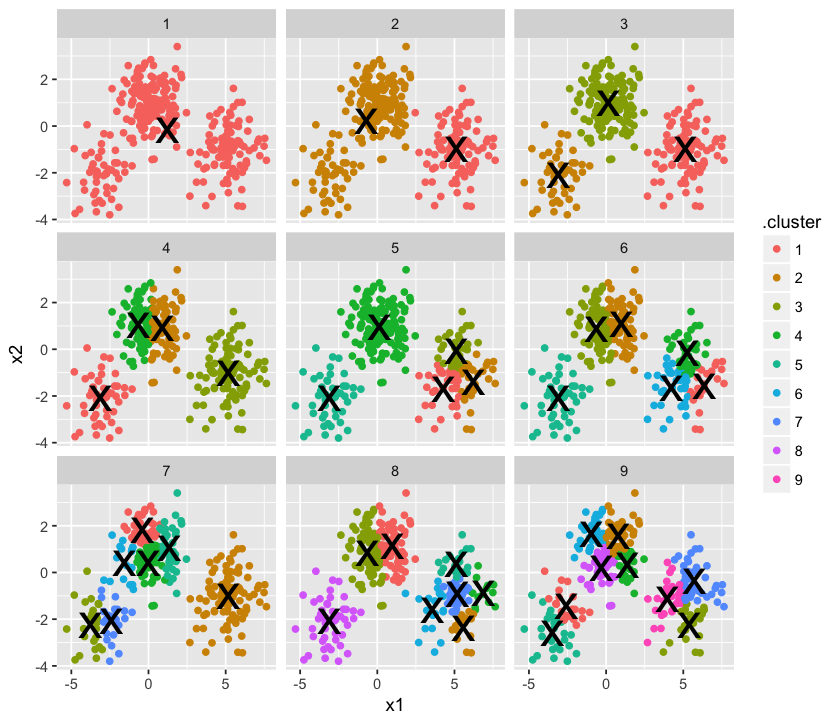

In [23]:
options(repr.plot.width=7, repr.plot.height=6)
p1 <- ggplot(assignments, aes(x1, x2)) + geom_point(aes(color=.cluster)) + facet_wrap(~ k) +
          geom_point(data=clusters, size=10, shape="x")
p1